In [5]:
import pandas as pd
from particletracking import dataframes
import filehandling
from matplotlib import pyplot as plt
import numpy as np
from scipy import spatial

directory = "/media/data/Data/BallBearing/Repeats/1,95mm"
files = filehandling.get_directory_filenames(directory+'/*.hdf5')

In [ ]:
for file in files:
    data = pd.read_hdf(file)
    frame0 = data.loc[0]
    frame0 = get_order_product(frame0)
    plt.figure()
    plt.scatter(data.loc[0, 'x'].values, data.loc[0, 'y'].values, c=np.angle(data.loc[0, 'hexatic_order'].values))

In [9]:
data.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,user_rad
frame,,,,,,,,,
0,38.721994,623.655704,867.612751,1.934301,0.184989,59.743119,4561.0,0.006400,6
0,38.577330,655.170781,885.000673,1.873452,0.280927,66.430781,4506.0,0.006478,6
0,39.636442,842.365277,1037.479379,1.886669,0.180366,78.914418,4799.0,0.006082,6
0,41.461240,1014.212694,920.222363,1.847243,0.070357,64.647404,5269.0,0.005539,6
0,41.441795,1224.198223,953.660675,1.805140,0.305258,86.493769,4023.0,0.007257,6


In [10]:
from matplotlib import pyplot as plt
from scipy import spatial
%matplotlib auto

fmax = data.index.max()
xy = data.loc[fmax, ['x', 'y']]
xy['z'] = 0
x = data.loc[fmax, 'x'].values
y = data.loc[fmax, 'y'].values
points = xy.values
print(points)
# vor = spatial.Voronoi(xy)
# spatial.voronoi_plot_2d(vor)

Using matplotlib backend: Qt5Agg
[[1282.48011028   41.65222529    0.        ]
 [1477.36783439   42.48917197    0.        ]
 [ 714.57335582   43.56492411    0.        ]
 ...
 [1716.00497822 2008.03671437    0.        ]
 [1724.89044756 2008.0501002     0.        ]
 [1734.8035461  2007.77659574    0.        ]]


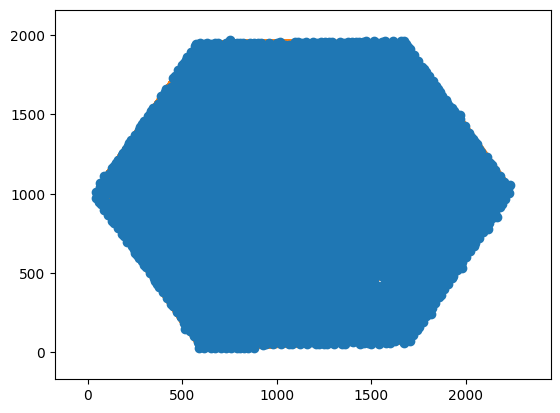

In [10]:
tri = spatial.Delaunay(xy)
spatial.delaunay_plot_2d(tri)

In [12]:
import freud
hex_order = freud.order.Hexatic(k=6, weighted=True)
box = freud.box.Box(Lx=x.max(), Ly=y.max(), is2D=True)
hex_order.compute((box, points), neighbors={"num_neighbors": 6})
psi_k = hex_order.particle_order
plt.scatter(x, y, c=psi_k)

/home/ppxjd3/miniconda3/envs/ExperimentsNew/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [17]:
data = pd.read_hdf(file)

In [18]:
frame0 = data.loc[0]


In [39]:
frame0['z'] = 0
points = frame0[['x', 'y', 'z']].values
orders = frame0['hexatic_order'].values

/home/ppxjd3/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
tri = spatial.Delaunay(points[:, :2])
list_indices, point_indices = tri.vertex_neighbor_vertices
order_product = []
for i in range(len(points)):
    neighbors = point_indices[list_indices[i]:list_indices[i+1]]
    all_orders = orders[neighbors]
    order_product.append(np.prod(all_orders))

plt.scatter(points[:, 0], points[:, 1], c=order_product)

/home/ppxjd3/miniconda3/envs/ExperimentsNew/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [8]:
from tqdm.auto import tqdm

def get_order_product(df):
    tri = spatial.Delaunay(df[['x', 'y']].values)
    orders = df['hexatic_order'].values
    list_indices, point_indices = tri.vertex_neighbor_vertices
    order_product = [
        np.prod(orders[point_indices[list_indices[i]:list_indices[i+1]]])
        for i in range(len(orders))]
    df['hexatic_order_product'] = order_product
    return df

In [35]:
dists = spatial.distance.pdist(frame0[['x', 'y']].values)
# dists = spatial.distance.squareform(dists)
plt.hist(dists, bins=np.linspace(0, 100, 1000))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [45]:
import freud

%matplotlib auto
directory = "/media/data/Data/BallBearing/Repeats/1,95mm"
files = filehandling.get_directory_filenames(directory+'/*.hdf5')
for file in files[:1]:
    data = pd.read_hdf(file)
    frame0 = data.loc[0]
    frame0 = get_order_product(frame0)
    frame0['z'] = 0
    points = frame0[['x', 'y', 'z']].values
    points_above = points[frame0.hexatic_order_product.values > 0.5, :]
    cl = freud.cluster.Cluster()
    box = freud.box.Box(Lx=2*frame0.x.max(), Ly=2*frame0.y.max(), is2D=True)
    cl.compute((box, points_above), neighbors={'r_max': 30})

    cl_props = freud.cluster.ClusterProperties()
    cl_props.compute((box, points_above), cl.cluster_idx)

    # plt.figure()
    # plt.scatter(frame0.x.values, frame0.y.values, c=np.abs(frame0.hexatic_order_product.values)>0.5)

Using matplotlib backend: Qt5Agg


/home/ppxjd3/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [46]:
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], c=frame0.hexatic_order_product.values>0.5)
for c, r in zip(cl_props.centers, cl_props.radii_of_gyration):
    cir = plt.Circle(c[:2], r)
    ax.add_patch(cir)
    print(c)




[571.5664 810.1903   0.    ]
[733.65454 416.95886   0.     ]
[1300.6133 1971.8007    0.    ]
[ 556.7241 1112.711     0.    ]
[942.5134  486.21863   0.     ]
[ 630.2859 1882.0223    0.    ]
[ 874.5867 1933.5651    0.    ]
[497.54492 529.81165   0.     ]
[1343.2339   240.06897    0.     ]
[ 970.4175 1775.9396    0.    ]
[ 638.02734 1591.7633     0.     ]
[1832.6362   348.04504    0.     ]
[1290.5581  545.3668    0.    ]
[ 580.3323 1352.5206    0.    ]
[885.6826  241.17493   0.     ]
[ 772.5935 1250.5519    0.    ]
[ 768.6299 1038.1898    0.    ]
[1838.4424  565.234     0.    ]
[ 356.60547 1160.3046     0.     ]
[ 359.7339 1332.0358    0.    ]
[1642.5076   452.39368    0.     ]
[1137.8083  573.161     0.    ]
[1376.0674 1627.2582    0.    ]
[1204.7847 1641.6886    0.    ]
[1705.542    152.97571    0.     ]
[725.11694 172.0055    0.     ]
[ 783.04297 1482.055      0.     ]
[ 836.22876 1674.9606     0.     ]
[1512.4495   192.62292    0.     ]
[1156.947    396.51526    0.     ]
[1473.0981   

In [23]:
def corr(df, r_min, r_max, dr):
    r_values = np.arange(r_min, r_max, dr)
    dists = spatial.distance.cdist(df[['x', 'y']].values, df[['x', 'y']].values).ravel()
    orders = df.hexatic_order_product.values
    orders_a, orders_b = np.meshgrid(orders, orders)
    orders = (orders_a @ np.conj(orders_b).transpose()).ravel()
    g6, _ = np.histogram(dists, bins=r_values, weights=orders)
    plt.plot(r_values[:-1], g6)

/home/ppxjd3/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ppxjd3/miniconda3/envs/ExperimentsNew/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


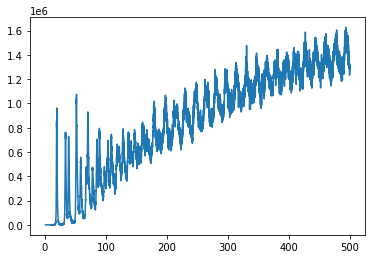

In [17]:
data = pd.read_hdf(files[0])
frame0 = data.loc[0]
frame0 = get_order_product(frame0)
corr(frame0, 1, 500, 0.1)

In [3]:
from labvision import video, images

vid = video.ReadVideo("/media/data/Data/BallBearing/Repeats/1,95mm/17810001.MP4")
im = vid.read_frame()

In [7]:
crop_result = images.crop_polygon(im)

In [4]:
im2 = images.crop_and_mask(im, crop_result.bbox, crop_result.mask)
images.display(im2)

[]

In [6]:
import numpy as np
im_fft = np.fft.fft2(im2)

TypeError: Image data of dtype complex128 cannot be converted to float

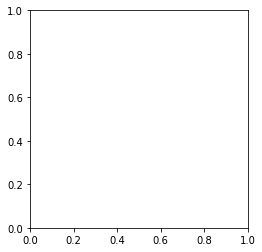

In [8]:
import matplotlib.pyplot as plt
plt.imshow(im_fft)

In [18]:
from scipy import fftpack
from matplotlib.colors import LogNorm
%matplotlib auto
# im2 = images.bgr_to_gray(im2)
im_fft = fftpack.fft2(im2)
im_fft_abs = np.abs(im_fft)
im_fft_abs_shift = fftpack.fftshift(im_fft_abs)
plt.imshow(im_fft_abs_shift, norm=LogNorm())

Using matplotlib backend: Qt5Agg


In [31]:
im_fft_abs_y = im_fft_abs[:, 0]
Ly = len(im_fft_abs_y)
freq = fftpack.fftfreq(Ly)
plt.semilogy(freq[:Ly//2], im_fft_abs_y[:Ly//2])
plt.xlabel('Freq (1/pix)')

Text(0.5, 0, 'Freq (1/pix)')

In [28]:
plt.imshow(im)

In [5]:
from scipy import fftpack

def get_1d_fft(im):
    im_fft = fftpack.fft2(im).copy()
    Ly, Lx = im_fft.shape
    im_fft_sect = im_fft[:Ly//2, :Lx//2]

    # plt.imshow(np.abs(im_fft_sect), norm=LogNorm())

    # y = np.arange(0, Ly//2, 1)
    # x = np.arange(0, Lx//2, 1)
    # y, x = np.meshgrid(y, x)

    im_fft_ravel = im_fft_sect.ravel()
    # y_r = y.ravel()
    # x_r = x.ravel()
    # dists = np.sqrt(x_r**2+y_r**2)
    # hist_weighted, bins = np.histogram(dists, bins=np.arange(np.max(dists)), weights=np.abs(im_fft_ravel))
    # hist, _ = np.histogram(dists, bins=bins)
    im_fft_y = im_fft_sect[:, 0]
    freq = fftpack.fftfreq(Ly)
    return freq[:Ly//2], im_fft_y

In [ ]:
from tqdm import tqdm

bins, hist = zip(*[
    get_1d_fft(
        images.bgr_to_gray(
            images.crop_and_mask(
                im, crop_result.bbox, crop_result.mask)))
    for im in tqdm(vid)])


 41%|████      | 89/216 [00:38<01:01,  2.06it/s]

In [1]:
bins0 = bins[0]
hist_mean = np.mean(np.stack(hist), axis=0)
plt.semilogy(bins0, np.abs(hist_mean))

NameError: name 'bins' is not defined

In [2]:

vid2 = video.ReadVideo("/media/data/Data/BallBearing/Repeats/1,97mm/17820001.MP4")
bins2, hist2 =     get_1d_fft(
        images.bgr_to_gray(
            images.crop_and_mask(
                vid2.read_frame(0), crop_result.bbox, crop_result.mask)))

NameError: name 'video' is not defined

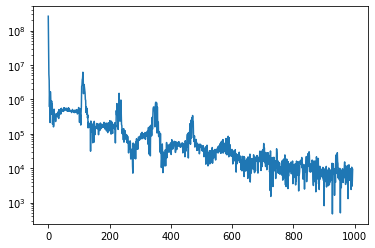

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# bins2 = bins2[0]
hist2_mean = np.mean(np.stack(hist2), axis=0)
plt.semilogy(np.abs(hist2_mean))